# Закономерности успешности игры 

## Общее описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности.

Перед Вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и Вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание признакового пространства
|Имя поля|Описание поля|
|-------------:|:------------|
|**Name** | название игры|
|**Platform** | платформа|
|**Year_of_Release** |  год выпуска|
|**Genre** | жанр игры|
|**NA_sales** | продажи в Северной Америке (миллионы проданных копий)|
|**EU_sales** | продажи в Европе (миллионы проданных копий)|
|**JP_sales** | продажи в Японии (миллионы проданных копий)|
|**Other_sales** | продажи в других странах (миллионы проданных копий)|
|**Critic_Score** | оценка критиков (максимум 100)|
|**User_Score** | оценка пользователей (максимум 10)|
|**Rating** | рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию|

## Инструкция по выполнению проекта

**Шаг 1. Откройте файл с данными и изучите общую информацию**

**Шаг 2. Подготовьте данные**
- Замените названия столбцов;
- Преобразуйте данные в нужные типы. 
- Обработайте пропуски при необходимости:
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте для каждого региона**
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).

**Шаг 5. Проверьте гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import matplotlib.ticker as ticker
from scipy import stats

In [2]:
df = pd.read_csv('project4.csv', delimiter= ',')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()# проверила тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = df.columns.str.lower() # заменила регистр в заголовках
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
for t in set (df.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df.select_dtypes(include=[t]).describe(), '\n')

Переменные типа object
                               name platform   genre user_score rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990 

Переменные типа float64
       year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000  

In [8]:
df.duplicated().sum() # строки не дублируются

0

In [9]:
df['user_score'].value_counts() # 'tbd' - самое частое значение - удалить не можем заменим на nan

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [10]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df = df.replace('tbd', np.nan)
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [12]:
df['user_score'] = df['user_score'].astype('float64')
df.info() # привела user_score к типу float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [13]:
pd.concat([df.isna().sum().to_frame(name = 'count_missing_value'),
          df.isna().mean().to_frame(name = 'pct_missing_value')], axis=1)

,count_missing_value,pct_missing_value
name,2,0.000120
platform,0,0.000000
year_of_release,269,0.016093
genre,2,0.000120
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,0.513192
user_score,9125,0.545917


In [14]:
df[df.name.isna()].index

Int64Index([659, 14244], dtype='int64')

In [15]:
df[df.genre.isna()].index # пропуски данных в одних и тех же местах - можем выкинуть

Int64Index([659, 14244], dtype='int64')

In [16]:
df.drop(df[df.name.isna()].index, inplace=True)

In [17]:
df[['name', 'genre']].isna().sum()

name     0
genre    0
dtype: int64

In [18]:
df.drop(df[df.year_of_release.isna()].index, inplace=True)
df['year_of_release'].isna().sum()

0

In [19]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<AxesSubplot:title={'center':'Доля игр без оценки критиков'}, xlabel='year_of_release'>

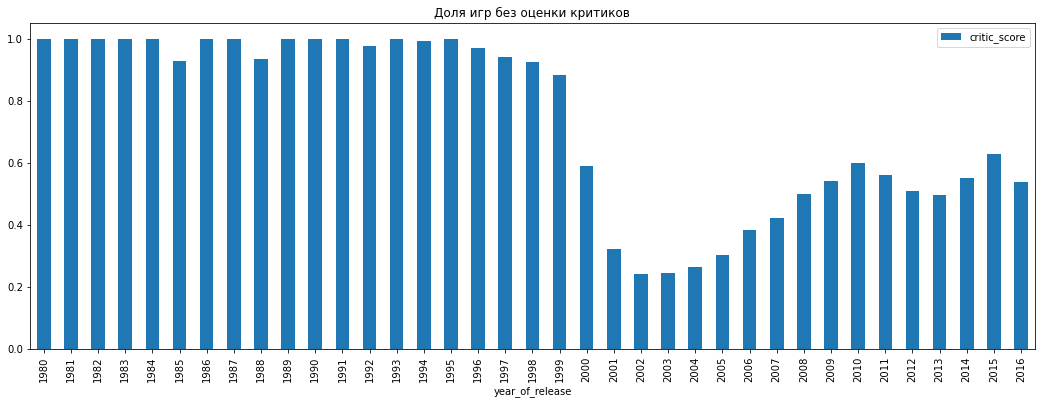

In [20]:
df.groupby('year_of_release')\
.agg({'critic_score': lambda x: x.isnull().mean()}) \
.plot.bar(title = 'Доля игр без оценки критиков', figsize = (18, 6))

In [21]:
df.rating.fillna('undefined', inplace=True)

In [22]:
df[['critic_score', 'user_score', 'rating']].isna().sum()

critic_score    8461
user_score      8981
rating             0
dtype: int64

In [23]:
pd.concat([df.isna().sum().to_frame(name = 'count_missing_value'),
          df.isna().mean().to_frame(name = 'pct_missing_value')], axis=1)

,count_missing_value,pct_missing_value
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8461,0.514534
user_score,8981,0.546157


In [24]:
df.drop(df.query('(na_sales == 0) & (eu_sales == 0) & (jp_sales == 0) & (other_sales == 0)').index, inplace=True)
# удаление игр с суммарными нулевыми продажами

In [25]:
df.query('(na_sales == 0)& (eu_sales == 0) & (jp_sales == 0) & (other_sales == 0)').index # или так, удалили 2 игры

Int64Index([], dtype='int64')

In [26]:
df['full_sales'] = df['na_sales'] +df['eu_sales'] +df['jp_sales'] +df['other_sales'] 

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


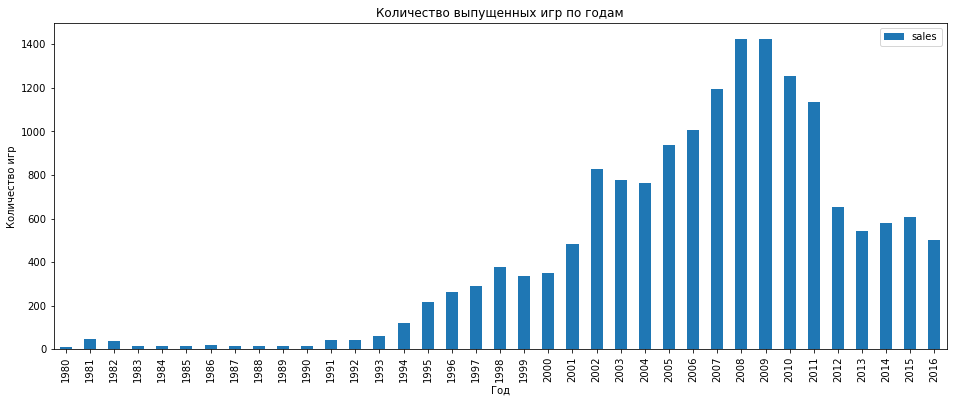

In [28]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(16, 6))
games_all = df.groupby('year_of_release').agg(sales = ('name','count'))
games_all.plot.bar(ax=ax);
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')
plt.show();

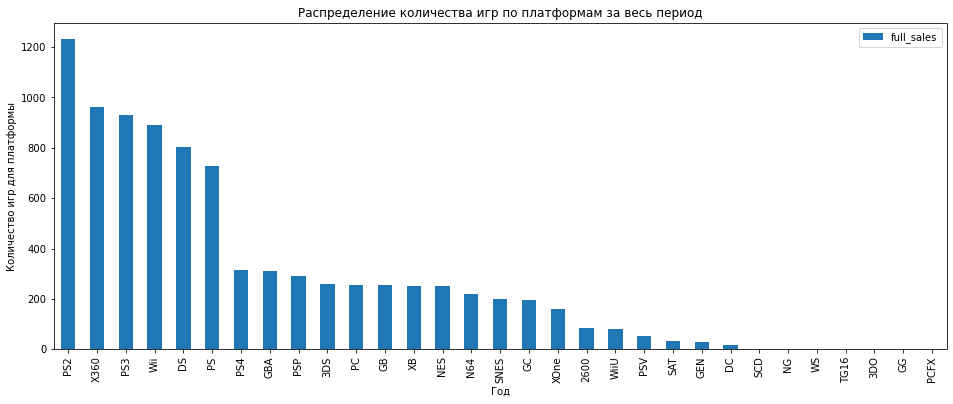

In [29]:
fig, ax = plt.subplots(figsize=(16, 6))
platform_on_sales = df.groupby('platform').agg(full_sales = ('full_sales','sum')).sort_values(by = 'full_sales', ascending = False)
platform_on_sales.plot.bar(ax=ax);
plt.xlabel('Год')
plt.ylabel('Количество игр для платформы')
plt.title('Распределение количества игр по платформам за весь период')
plt.show();

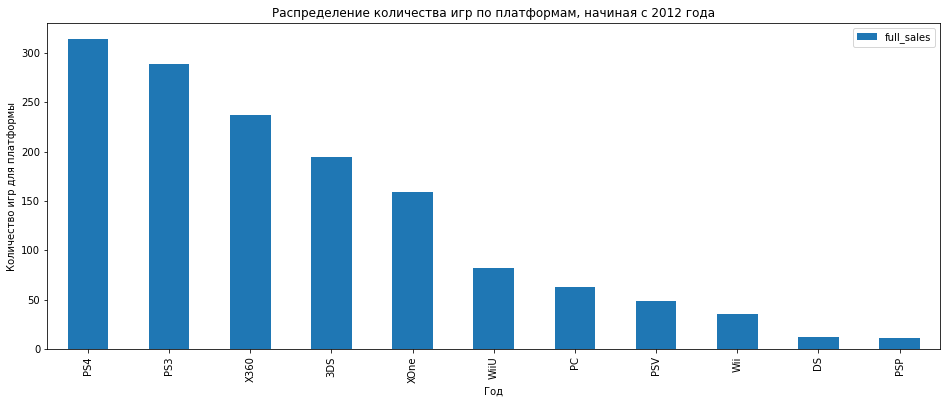

In [30]:
fig, ax = plt.subplots(figsize=(16, 6))
platform_on_sales_from_2012 = df[df.year_of_release >= 2012].groupby('platform')\
.agg(full_sales = ('full_sales','sum')).sort_values(by='full_sales', ascending=False)
platform_on_sales_from_2012.plot.bar(ax=ax);
plt.xlabel('Год')
plt.ylabel('Количество игр для платформы')
plt.title('Распределение количества игр по платформам, начиная с 2012 года')
plt.show();

$\blacktriangleright$ Топ-5 платформ с наибольшими суммарными продажами за весь период наблюдений
<a class="anchor" id="actual_flatform_all"></a>

In [31]:
top_5_from_all = platform_on_sales.reset_index().rename_axis(None, axis=1)[:5]
display(top_5_from_all)

,platform,full_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


$\blacktriangleright$ Топ-5 платформ с наибольшими суммарными продажами, начиная с 2012 года
<a class="anchor" id="actual_flatform"></a>

In [32]:
top_5_from_2012 = platform_on_sales_from_2012.reset_index().rename_axis(None, axis=1)[:5]
display(top_5_from_2012)

,platform,full_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


$\blacktriangleright$ Для топ-5 платформ за весь период и с 2012 года соберем сведения во временные датафреймы
<a class="anchor" id="top_5_2012"></a>

In [33]:
df_top5_plat_all = df.loc[df['platform'].isin(list(top_5_from_all['platform']))]
df_top5_plat_from_2012 = df[df.year_of_release >= 2012].loc[df['platform'].isin(list(top_5_from_2012['platform']))]

$\blacktriangleright$ Сводные таблицы для топ-5 платформ за весь период наблюдений и с 2012: распределение продаж по годам

In [34]:
top_5_all = df_top5_plat_all.pivot_table(index='year_of_release', columns='platform', 
                             values='full_sales', aggfunc='sum')\
                            .sort_values('year_of_release', ascending=False).fillna(0)

top2012_5 = df_top5_plat_from_2012.pivot_table(index='year_of_release', columns='platform', 
                             values='full_sales', aggfunc='sum')\
                            .sort_values('year_of_release', ascending=False).fillna(0)

$\blacktriangleright$ Кривые для жизненного цикла топ-5 платформ
<a class="anchor" id="lc"></a>

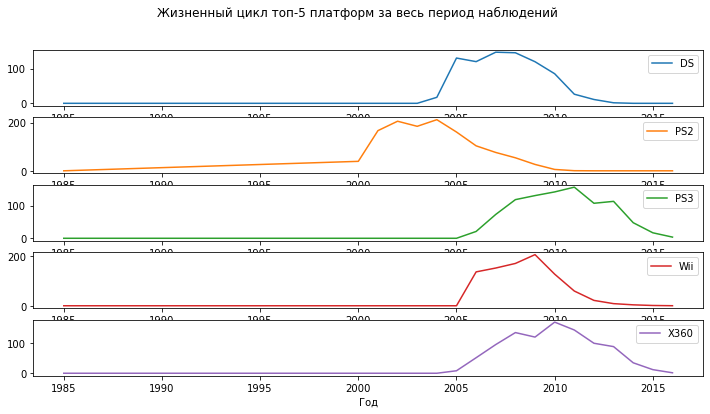

In [35]:
top_5_all.plot(kind='line', subplots=True, figsize=(12, 6), sharex = False, sharey = False, 
               title = 'Жизненный цикл топ-5 платформ за весь период наблюдений');
plt.xlabel('Год')
plt.show();

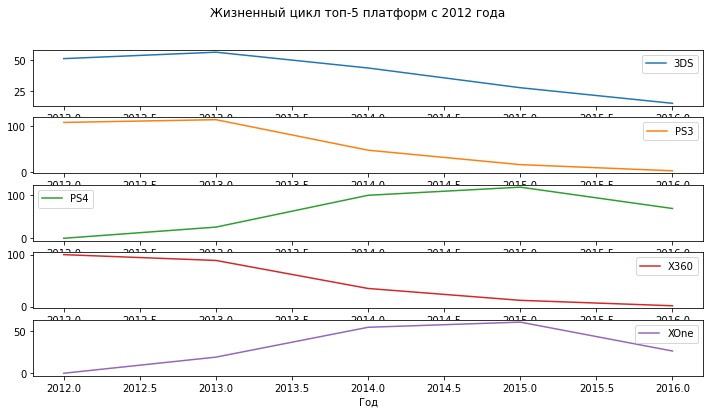

In [36]:
top2012_5.plot(kind='line', subplots=True, figsize=(12, 6), sharex = False, sharey = False, 
               title = 'Жизненный цикл топ-5 платформ с 2012 года');
plt.xlabel('Год')
plt.show();

In [37]:
df_top5_plat_from_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1820 non-null   object 
 1   platform         1820 non-null   object 
 2   year_of_release  1820 non-null   int64  
 3   genre            1820 non-null   object 
 4   na_sales         1820 non-null   float64
 5   eu_sales         1820 non-null   float64
 6   jp_sales         1820 non-null   float64
 7   other_sales      1820 non-null   float64
 8   critic_score     910 non-null    float64
 9   user_score       1071 non-null   float64
 10  rating           1820 non-null   object 
 11  full_sales       1820 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 184.8+ KB


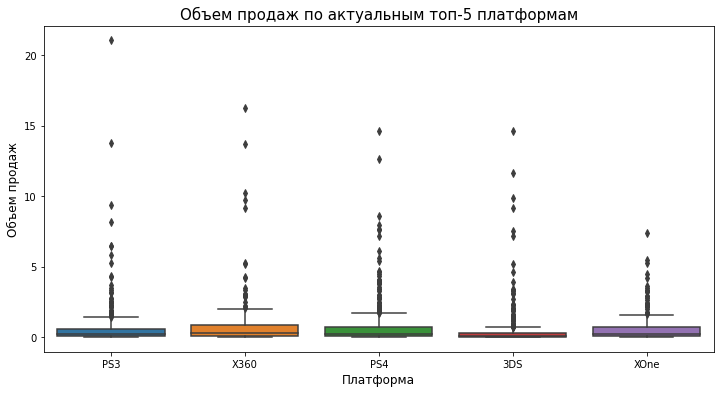

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top5_plat_from_2012, x='platform', y='full_sales');
plt.title('Объем продаж по актуальным топ-5 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show();

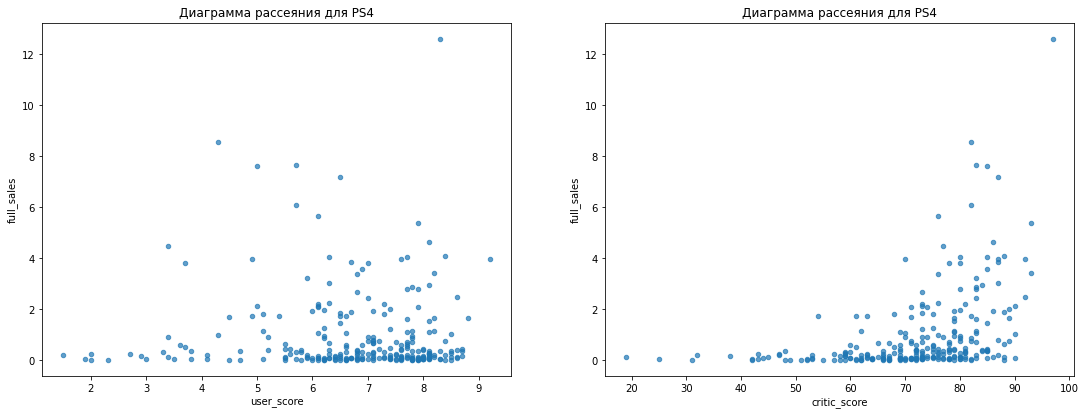

In [39]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 6.5)

growing_platforms = ['PS4']
score_types = ['user_score', 'critic_score']
num_of_subplot = 0

for platform_name in growing_platforms:
    for score_type in score_types:
        (df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]
         .plot(x=score_type, 
               y='full_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               ax = ax[num_of_subplot],
               alpha=0.7))
        num_of_subplot += 1

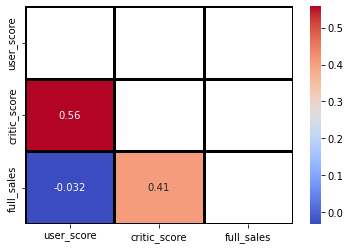

In [40]:
matrix = np.triu(df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == 'PS4']\
            [['user_score', 'critic_score', 'full_sales']].corr())
sns.heatmap(df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == 'PS4']\
            [['user_score', 'critic_score', 'full_sales']].corr(), annot = True, 
            mask=matrix, cmap= 'coolwarm', linewidths=3, linecolor='black');


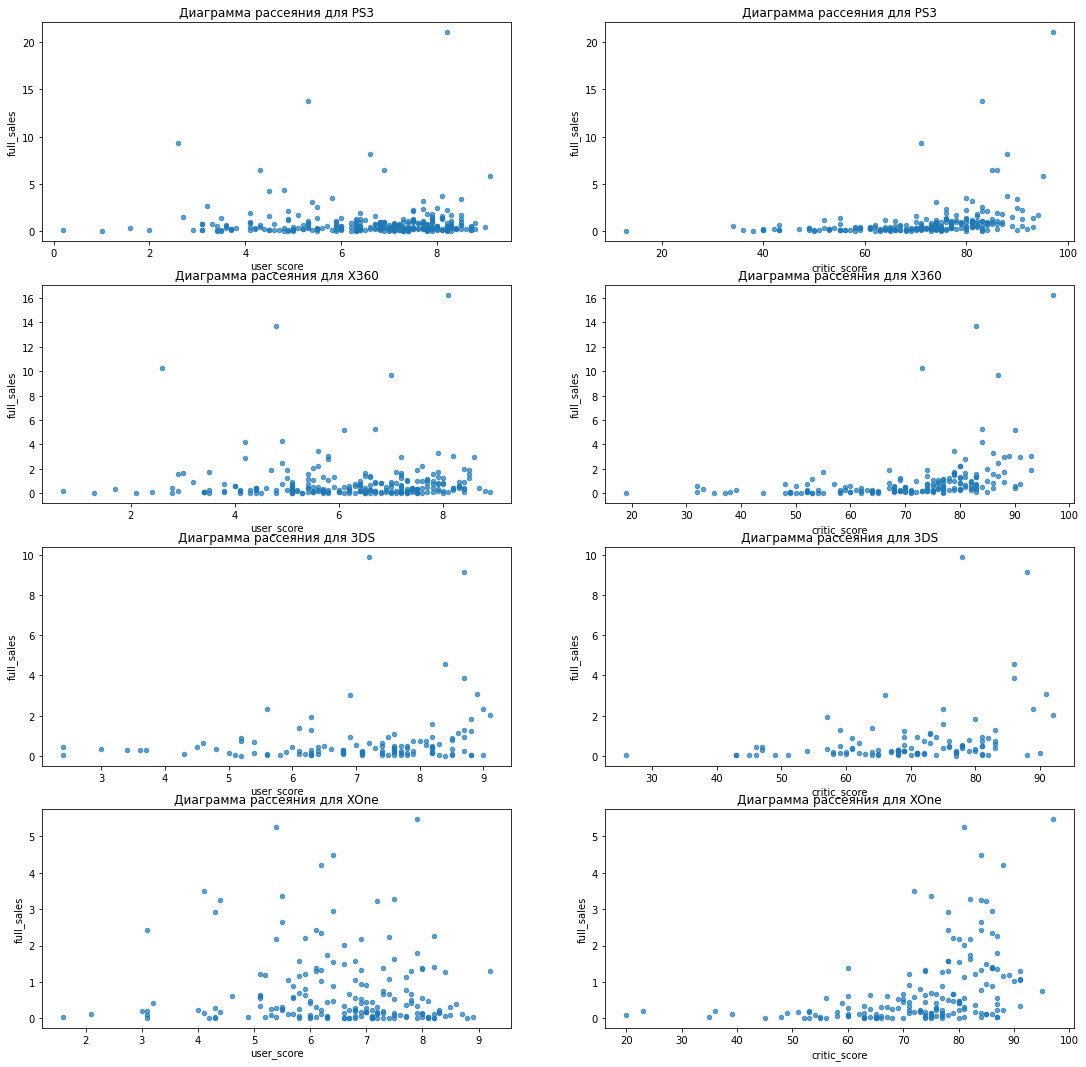

In [41]:
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(18.5, 18.5)
axs = [ax[i, j] for i in range(4) for j in range(2)]

growing_platforms = ['PS3', 'X360', '3DS', 'XOne']
score_types = ['user_score', 'critic_score']
num_of_subplot = 0
for platform_name in growing_platforms:
    for score_type in score_types:
        (df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]
         .plot(x=score_type, 
               y='full_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               ax = axs[num_of_subplot],
               alpha=0.7))
        num_of_subplot += 1

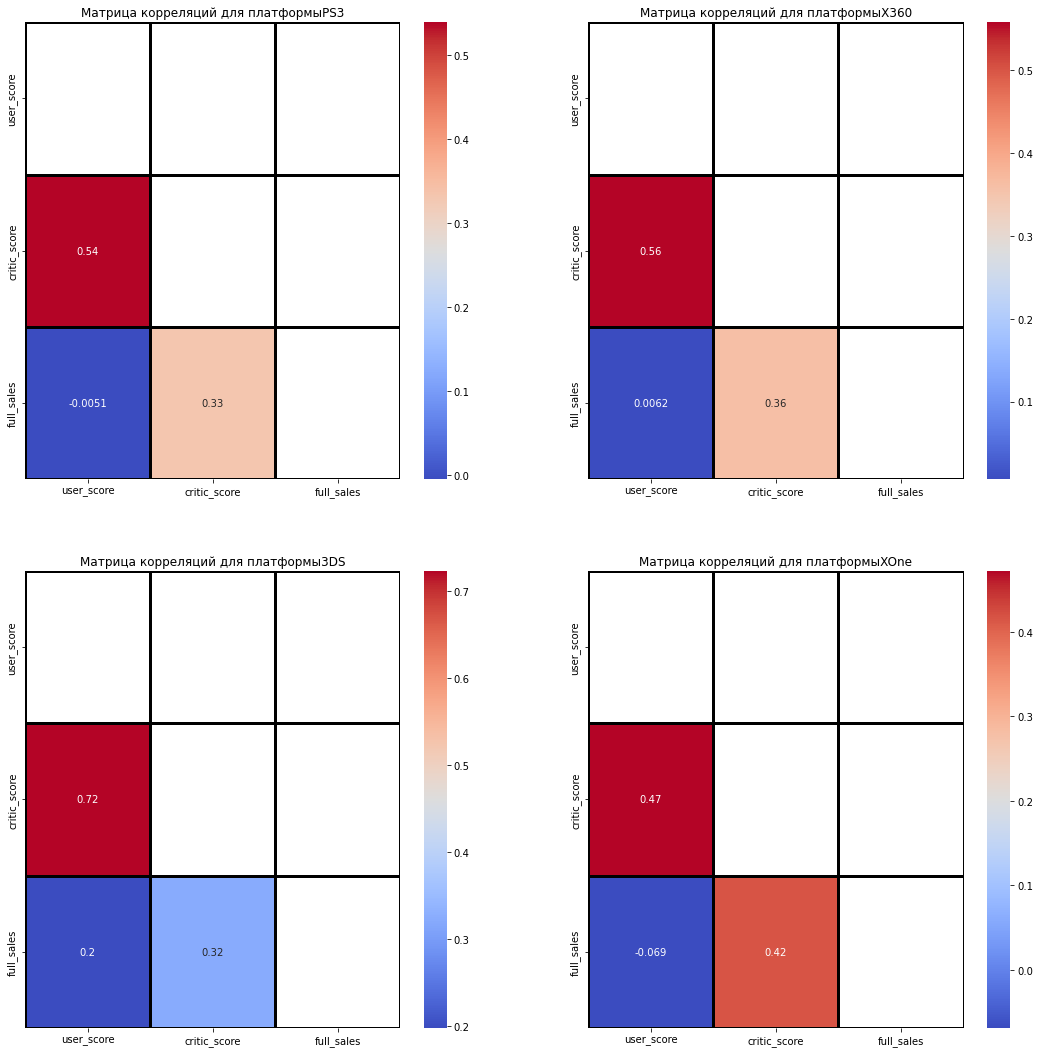

In [42]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 18.5)
axs = [ax[i, j] for i in range(2) for j in range(2)]

growing_platforms = ['PS3', 'X360', '3DS', 'XOne']
score_types = ['user_score', 'critic_score']
num_of_subplot = 0
for platform_name in growing_platforms:
    matrix = np.triu(df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]\
            [['user_score', 'critic_score', 'full_sales']].corr())
    sns.heatmap(df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]\
            [['user_score', 'critic_score', 'full_sales']].corr(), annot = True, 
            mask=matrix, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = axs[num_of_subplot]);
    axs[num_of_subplot].set_title('Матрица корреляций для платформы{}'.format(platform_name))
    num_of_subplot += 1

In [43]:
distr_genre = df_top5_plat_from_2012.pivot_table(index='genre', values='full_sales', aggfunc='sum')\
.sort_values(by='full_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
display(distr_genre)

,genre,full_sales
0,Action,376.25
1,Shooter,282.11
2,Sports,167.81
3,Role-Playing,151.26
4,Misc,48.78
5,Racing,42.18
6,Fighting,35.53
7,Platform,34.13
8,Simulation,25.16
9,Adventure,22.68


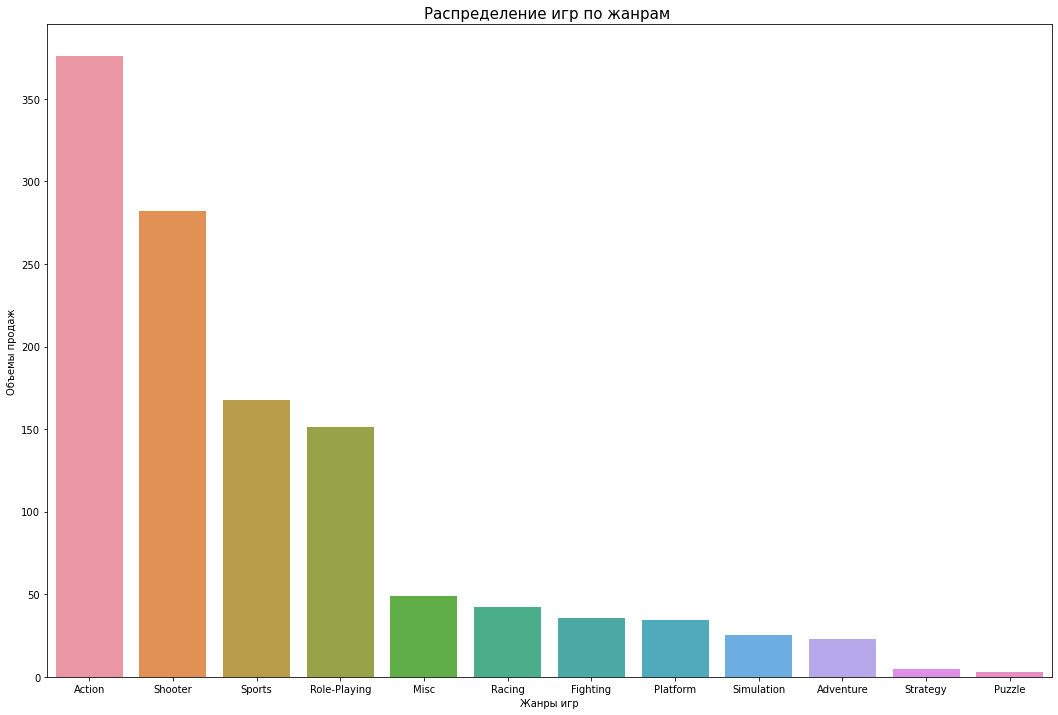

In [44]:
plt.figure(figsize=(18,12))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='full_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Объемы продаж');

In [45]:
na = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['platform'], 
            values=df_top5_plat_from_2012['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)

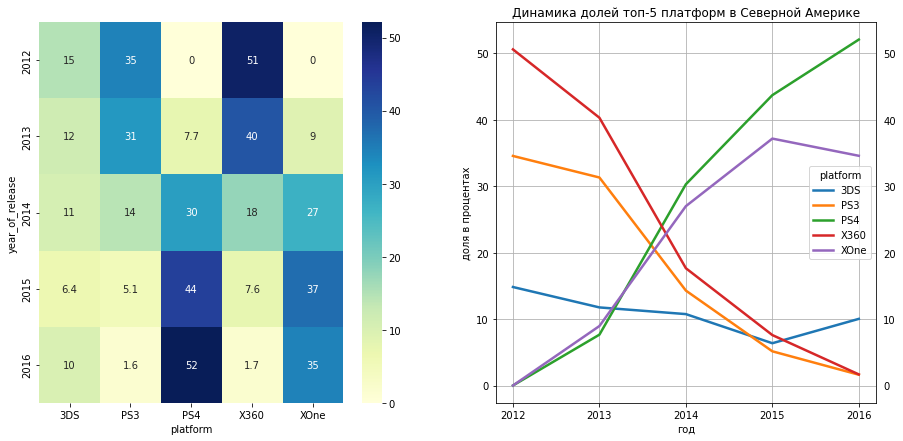

In [46]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(na, cmap="YlGnBu", annot=True, ax = ax[0]);
na.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=na.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 платформ в Северной Америке')
plt.show();


In [47]:
eu = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['platform'], 
            values=df_top5_plat_from_2012['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)

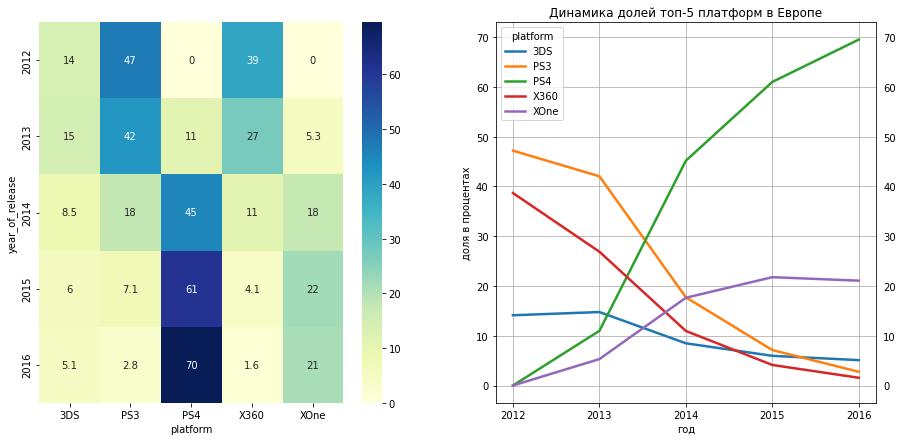

In [48]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(eu, cmap="YlGnBu", annot=True, ax = ax[0]);
eu.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=eu.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 платформ в Европе')
plt.show();

In [49]:
jp = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['platform'], 
            values=df_top5_plat_from_2012['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)

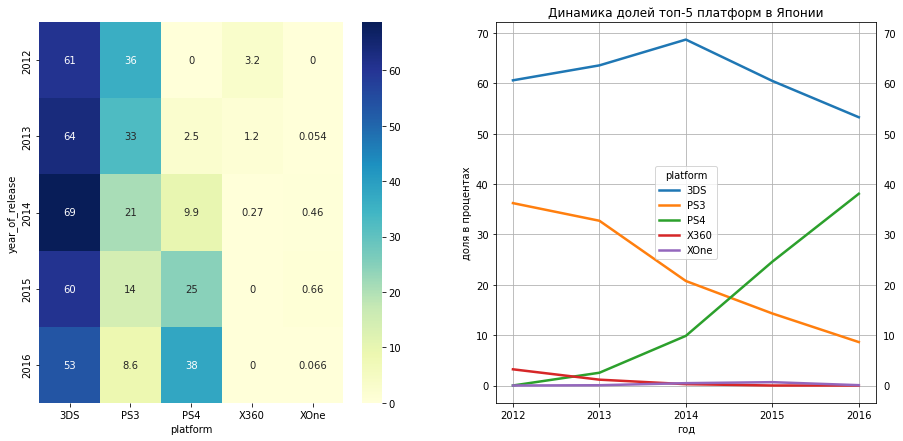

In [50]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(jp, cmap="YlGnBu", annot=True, ax = ax[0]);
jp.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=jp.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 платформ в Японии')
plt.show();

In [51]:
na = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['genre'], 
            values=df_top5_plat_from_2012['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)
top5_genre = na[df_top5_plat_from_2012.genre.unique()].apply('sum', axis = 0).sort_values(ascending = False)[:5]
list(top5_genre.index)
top5_genre_na = na[list(top5_genre.index.sort_values())]
top5_genre_na

genre,Action,Misc,Role-Playing,Shooter,Sports
year_of_release,,,,,
2012,34.451378,2.080083,8.164327,28.289132,12.142486
2013,36.909709,7.004156,9.013978,21.752928,13.774084
2014,30.054931,6.766065,10.794315,25.930770,16.862848
2015,22.874536,3.146925,12.979777,31.015270,19.129179
2016,19.946680,0.920989,13.330102,37.081920,18.250121


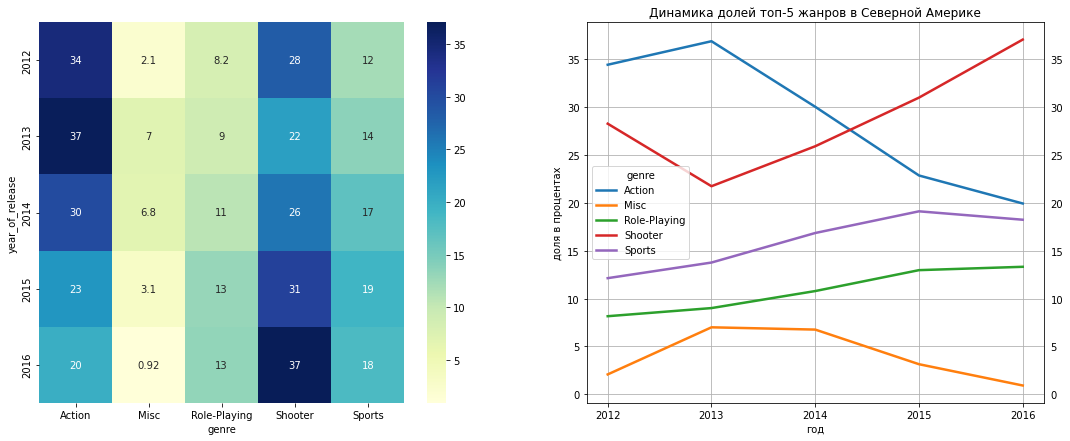

In [52]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
sns.heatmap(top5_genre_na, cmap="YlGnBu", annot=True, ax = ax[0]);
top5_genre_na.plot(grid=True, lw=2.5, ax = ax[1])
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=top5_genre_na.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Северной Америке')
plt.show();

In [53]:
eu = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['genre'], 
            values=df_top5_plat_from_2012['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)
top5_genre = eu[df_top5_plat_from_2012.genre.unique()].apply('sum', axis = 0).sort_values(ascending = False)[:5]
list(top5_genre.index)
top5_genre_eu = eu[list(top5_genre.index.sort_values())]
top5_genre_eu

genre,Action,Racing,Role-Playing,Shooter,Sports
year_of_release,,,,,
2012,38.015230,6.841533,6.454732,27.656231,8.364559
2013,39.062966,5.650055,8.216453,19.297722,12.434099
2014,33.906706,5.014577,9.135083,22.847425,16.248785
2015,25.179771,5.363669,13.332547,26.240717,18.106802
2016,20.870707,3.609713,8.160140,32.421790,25.814920


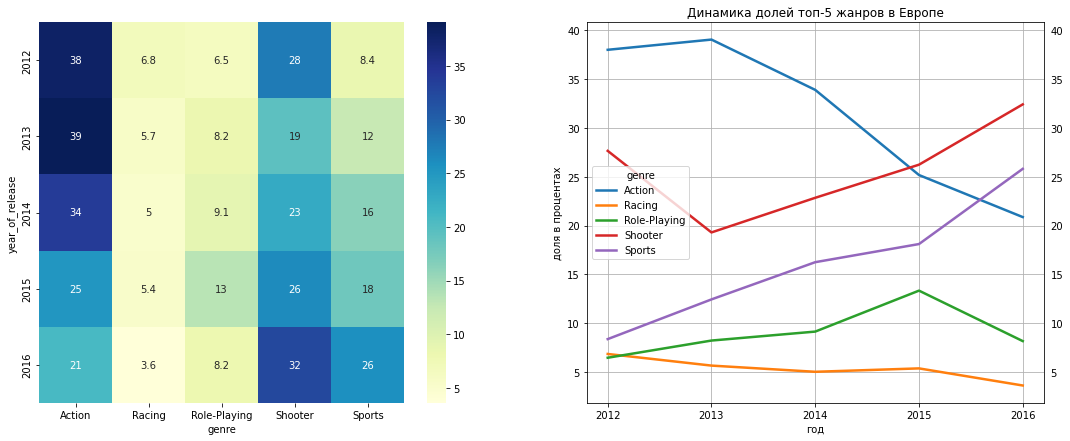

In [54]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
sns.heatmap(top5_genre_eu, cmap="YlGnBu", annot=True, ax = ax[0]);
top5_genre_eu.plot(grid=True, lw=2.5, ax = ax[1])
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=top5_genre_eu.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Европе')
plt.show();

In [55]:
jp = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['genre'], 
            values=df_top5_plat_from_2012['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)
top5_genre = jp[df_top5_plat_from_2012.genre.unique()].apply('sum', axis = 0).sort_values(ascending = False)[:5]
list(top5_genre.index)
top5_genre_jp = jp[list(top5_genre.index.sort_values())]
top5_genre_jp

genre,Action,Fighting,Role-Playing,Shooter,Simulation
year_of_release,,,,,
2012,24.651304,4.335961,21.194663,7.762280,17.434809
2013,24.346185,2.830952,43.920194,4.556484,5.958479
2014,15.864587,12.147361,51.775639,3.551278,1.261201
2015,53.408648,3.077522,19.477990,4.947409,6.116089
2016,35.145889,3.183024,37.201592,6.564987,2.122016


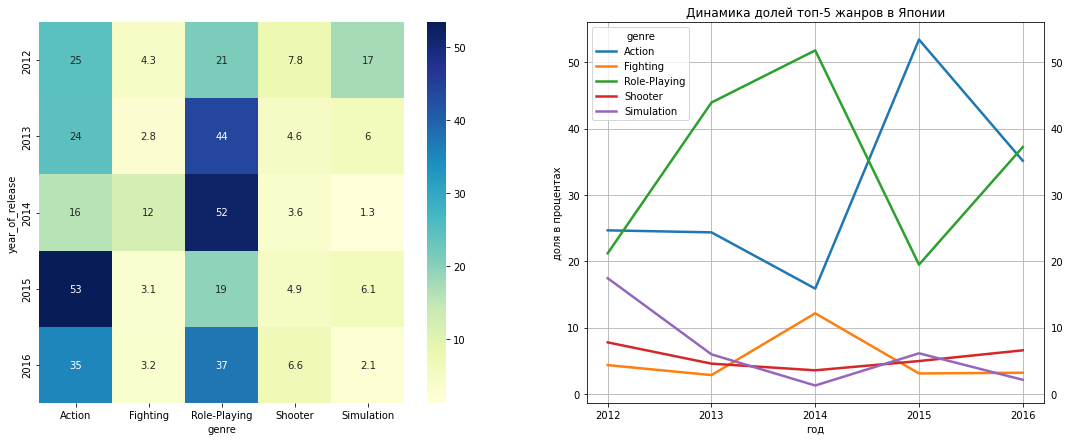

In [56]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
sns.heatmap(top5_genre_jp, cmap="YlGnBu", annot=True, ax = ax[0]);
top5_genre_jp.plot(grid=True, lw=2.5, ax = ax[1])
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=top5_genre_jp.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Японии')
plt.show();

In [57]:
dict_rating = {'E':'старше 6 лет',
               'E10+':'старше 10 лет',
               'T':'старше 13 лет',
               'M':'старше 17 лет',
               'undefined': 'Рейтинг неизвестен'}
df_top5_plat_from_2012['rating'] = df_top5_plat_from_2012['rating'].map(dict_rating)

In [58]:
na = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['rating'], 
            values=df_top5_plat_from_2012['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)
na

rating,Рейтинг неизвестен,старше 10 лет,старше 13 лет,старше 17 лет,старше 6 лет
year_of_release,,,,,
2012,6.534928,8.363668,11.275784,49.713989,24.111631
2013,16.259917,9.867775,6.535701,49.814885,17.521723
2014,20.577208,10.332200,11.953963,40.326096,16.810533
2015,29.178704,11.174164,13.309946,30.447792,15.889393
2016,19.631604,6.301503,18.904508,36.500242,18.662143


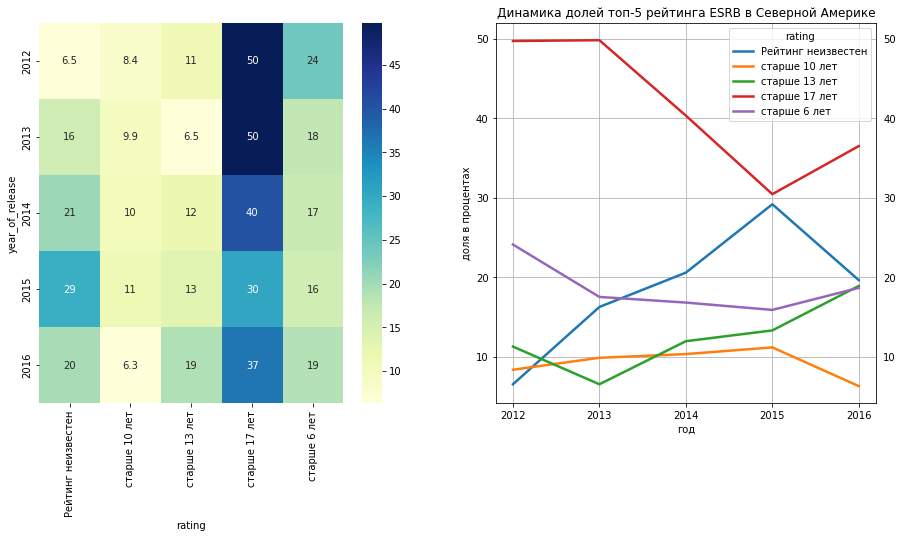

In [59]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(na, cmap="YlGnBu", annot=True, ax = ax[0]);
na.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=na.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Северной Америке')
plt.show();

In [60]:
eu = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['rating'], 
            values=df_top5_plat_from_2012['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)
eu

rating,Рейтинг неизвестен,старше 10 лет,старше 13 лет,старше 17 лет,старше 6 лет
year_of_release,,,,,
2012,7.953584,7.071195,9.851324,47.745679,27.378218
2013,16.989953,10.195961,5.520740,47.796678,19.496668
2014,18.804665,10.447036,10.068027,42.206025,18.474247
2015,31.510079,5.564069,10.963103,30.838147,21.124602
2016,14.613870,5.797419,18.420477,33.756290,27.411945


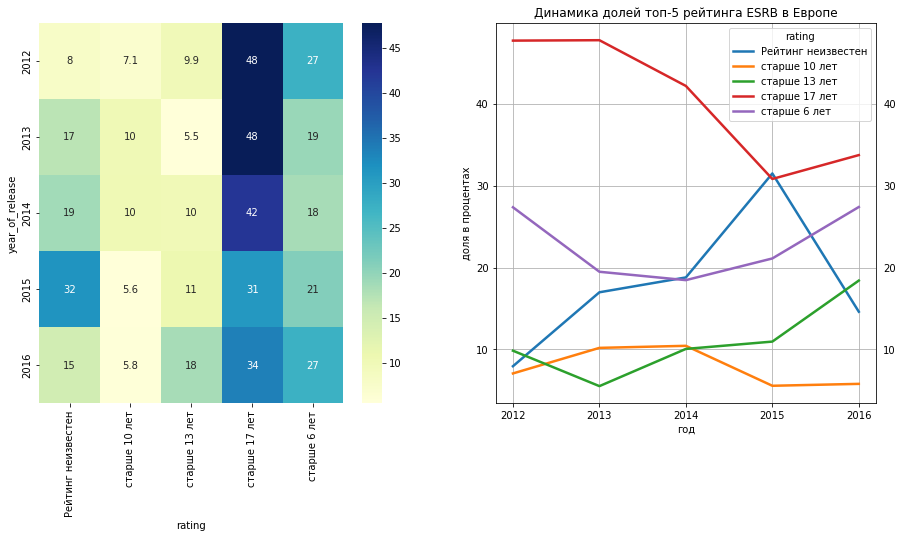

In [61]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(eu, cmap="YlGnBu", annot=True, ax = ax[0]);
eu.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=eu.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Европе')
plt.show();

In [62]:
jp = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['rating'], 
            values=df_top5_plat_from_2012['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)
jp

rating,Рейтинг неизвестен,старше 10 лет,старше 13 лет,старше 17 лет,старше 6 лет
year_of_release,,,,,
2012,30.169800,4.548211,13.947847,19.739236,31.594906
2013,59.530871,2.561337,12.267458,14.613103,11.027231
2014,63.391968,3.650846,16.395619,10.155991,6.405576
2015,60.225945,4.518894,14.530580,10.907674,9.816907
2016,73.541114,0.729443,11.206897,7.758621,6.763926


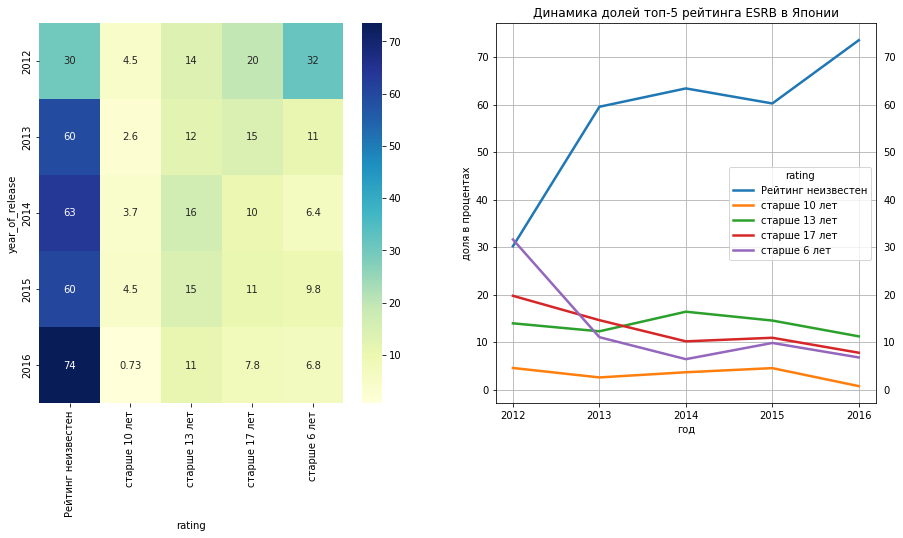

In [63]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(jp, cmap="YlGnBu", annot=True, ax = ax[0]);
jp.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=jp.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Японии')
plt.show();

**Шаг 5. Проверьте гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16442 non-null  object 
 11  full_sales       16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [65]:
df[df.user_score.isna()].index

Int64Index([    1,     4,     5,     9,    10,    12,    18,    20,    21,
               22,
            ...
            16703, 16704, 16706, 16707, 16708, 16710, 16711, 16712, 16713,
            16714],
           dtype='int64', length=8979)

In [66]:
df.drop(df[df.user_score.isna()].index, inplace=True)

In [67]:
df[['user_score']].isna().sum()

user_score    0
dtype: int64

In [68]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'full_sales'],
      dtype='object')

In [69]:
df[(df.genre == 'Sports') & (df.year_of_release >= 2012)].user_score.mean()

5.455897435897437

In [70]:
df[(df.genre == 'Action') & (df.year_of_release >= 2012)].user_score.mean()

6.825047801147237

/Users/soelexir/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


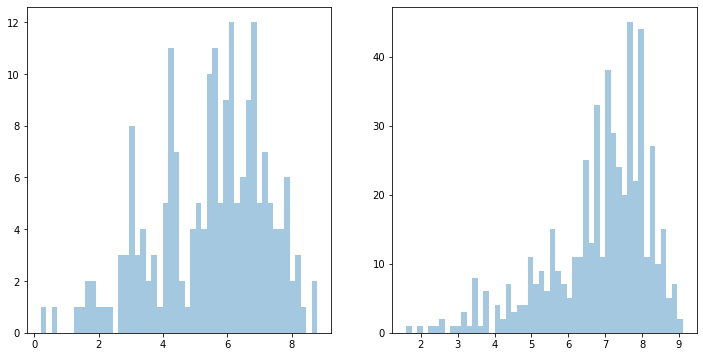

In [71]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(x = df[(df.genre == 'Sports') & (df.year_of_release >= 2012)].user_score, kde = False, bins = 50)
plt.subplot(122)
sns.distplot(x = df[(df.genre == 'Action') & (df.year_of_release >= 2012)].user_score, kde = False, bins = 50);


In [72]:
df[(df.platform == 'XOne') & (df.year_of_release >= 2012)].user_score.mean()

6.52142857142857

In [73]:
df[(df.platform == 'PC')& (df.year_of_release >= 2012) ].user_score.mean() 

6.428640776699027

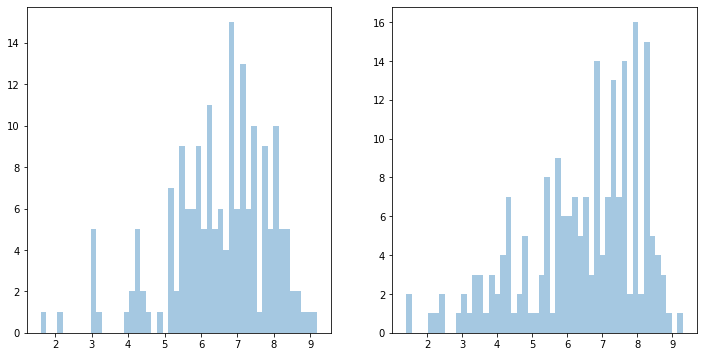

In [74]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(x = df[(df.platform == 'XOne') & (df.year_of_release >= 2012)].user_score, kde = False, bins = 50)
plt.subplot(122)
sns.distplot(x = df[(df.platform == 'PC') & (df.year_of_release >= 2012)].user_score, kde = False, bins = 50);

In [75]:
list_var1 = ['user_score']
alpha = 0.05
equal_var = False

In [79]:
for i in list_var1:
  print("Начало --------------  " + i + '  ----------------------------' )
  results = stats.mannwhitneyu(df[df.platform == 'XOne'].user_score, 
                               df[df.platform == 'PC'].user_score)
  print('Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:')
  print('Уровень значимости alpha = ', alpha)
  print('P-value: {:.2f}'.format(results.pvalue))
  if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в пользовательском рейтинге платформ Xbox One и PC статистически значима.')
  else:
    print('Не получилось отвергнуть нулевую гипотезу: разница в пользовательском рейтинге платформ Xbox One и PC статистически незначима.')
  print("Конец --------------  "+ i + '  ----------------------------' )

Начало --------------  user_score  ----------------------------
Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:
Уровень значимости alpha =  0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в пользовательском рейтинге платформ Xbox One и PC статистически значима.
Конец --------------  user_score  ----------------------------


In [76]:
for i in list_var1:
  print("Начало --------------  " + i + '  ----------------------------' )
  results = stats.mannwhitneyu(df[(df.platform == 'XOne') & (df.year_of_release >= 2012)].user_score, 
                               df[(df.platform == 'PC')& (df.year_of_release >= 2012) ].user_score)
  print('Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:')
  print('Уровень значимости alpha = ', alpha)
  print('P-value: {:.2f}'.format(results.pvalue))
  if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в пользовательском рейтинге платформ Xbox One и PC статистически значима.')
  else:
    print('Не получилось отвергнуть нулевую гипотезу: разница в пользовательском рейтинге платформ Xbox One и PC статистически незначима.')
  print("Конец --------------  "+ i + '  ----------------------------' )

Начало --------------  user_score  ----------------------------
Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:
Уровень значимости alpha =  0.05
P-value: 0.86
Не получилось отвергнуть нулевую гипотезу: разница в пользовательском рейтинге платформ Xbox One и PC статистически незначима.
Конец --------------  user_score  ----------------------------


In [77]:
list_var2 = ['user_score']
alpha = 0.05
equal_var = False

In [80]:
for i in list_var2:
  print("Начало --------------  " + i + '  ----------------------------' )
  results = stats.mannwhitneyu(df[df.genre == 'Sports'].user_score, 
                               df[df.genre == 'Action'].user_score)
  print('Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:')
  print('Уровень значимости alpha = ', alpha)
  print('P-value: {:.2f}'.format(results.pvalue))
  if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница в пользовательском рейтинге жанра Sport и Action статистически значима.')
  else:
    print('Не получилось отвергнуть нулевую гипотезу: разница в пользовательском рейтинге платформ Sport и Action статистически незначима.')
  print("Конец --------------  "+ i + '  ----------------------------' )

Начало --------------  user_score  ----------------------------
Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:
Уровень значимости alpha =  0.05
P-value: 0.57
Не получилось отвергнуть нулевую гипотезу: разница в пользовательском рейтинге платформ Sport и Action статистически незначима.
Конец --------------  user_score  ----------------------------


In [78]:
for i in list_var2:
  print("Начало --------------  " + i + '  ----------------------------' )
  results = stats.mannwhitneyu(df[(df.genre == 'Sports') & (df.year_of_release >= 2012)].user_score, 
                               df[(df.genre == 'Action') & (df.year_of_release >= 2012)].user_score)
  print('Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:')
  print('Уровень значимости alpha = ', alpha)
  print('P-value: {:.2f}'.format(results.pvalue))
  if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница в пользовательском рейтинге жанра Sport и Action статистически значима.')
  else:
    print('Не получилось отвергнуть нулевую гипотезу: разница в пользовательском рейтинге платформ Sport и Action статистически незначима.')
  print("Конец --------------  "+ i + '  ----------------------------' )

Начало --------------  user_score  ----------------------------
Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:
Уровень значимости alpha =  0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в пользовательском рейтинге жанра Sport и Action статистически значима.
Конец --------------  user_score  ----------------------------
